In [1]:
from ase.build import bulk
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import quantum_espresso
from pyiron_base import Project

# Workflow

## Structure Optimization

In [3]:
pseudopotentials = {"Al": "Al.pbe-n-kjpaw_psl.1.0.0.UPF"}

In [4]:
pr = Project("test")
pr.remove_jobs(recursive=True, silently=True)

In [5]:
structure = bulk('Al', a=4.15, cubic=True)

In [6]:
job_qe_minimize = pr.create.job.QEMinimize(job_name="qe_relax")

In [7]:
job_qe_minimize.input

DataContainer({'structure': None, 'pseudopotentials': {'Al': 'Al.pbe-n-kjpaw_psl.1.0.0.UPF'}, 'kpts': (3, 3, 3)})

In [8]:
job_qe_minimize.input.structure = structure

In [9]:
job_qe_minimize.run()

The job qe_relax was saved and received the ID: 1


In [10]:
structure_opt = job_qe_minimize.output.structure
structure_opt

Atoms(symbols='Al4', pbc=False, cell=[4.138958391, 4.138958391, 4.138958391])

## Energy Volume Curve

In [11]:
energy_lst, volume_lst = [], []
for i, strain in enumerate(np.linspace(0.9, 1.1, 5)):
    structure_strain = structure_opt.copy()
    structure_strain = structure.copy()
    structure_strain.set_cell(structure_strain.cell * strain**(1/3), scale_atoms=True)
    job_strain = pr.create.job.QEStatic(job_name="job_strain_" + str(i))
    job_strain.input.structure = structure_strain
    job_strain.run()
    energy_lst.append(job_strain.output.energy)
    volume_lst.append(job_strain.output.volume)

The job job_strain_0 was saved and received the ID: 2
The job job_strain_1 was saved and received the ID: 3
The job job_strain_2 was saved and received the ID: 4
The job job_strain_3 was saved and received the ID: 5
The job job_strain_4 was saved and received the ID: 6


# Result

Text(0, 0.5, 'Energy')

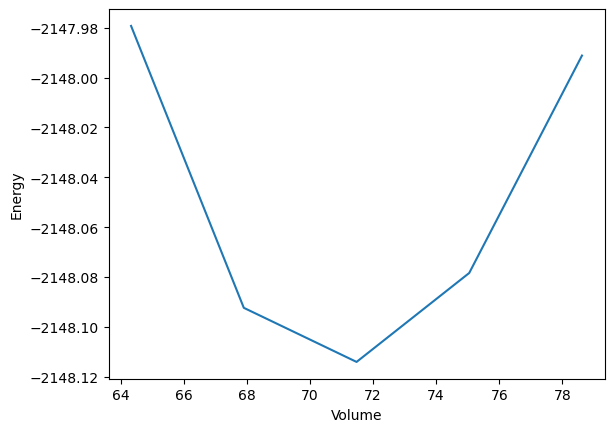

In [12]:
plt.plot(volume_lst, energy_lst)
plt.xlabel("Volume")
plt.ylabel("Energy")

# Summary

In [13]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,1,finished,None,qe_relax,/qe_relax,None,/home/jovyan/test/,2024-01-10 18:37:21.085881,2024-01-10 18:41:47.516765,266.0,pyiron@jupyter-jan-2djanssen-2dqua-2dsso-5fpyiron-5fbase-2drp35kdgz#1,QEMinimize,0.4,None,None
1,2,finished,None,job_strain_0,/job_strain_0,None,/home/jovyan/test/,2024-01-10 18:41:47.680916,2024-01-10 18:42:49.203468,61.0,pyiron@jupyter-jan-2djanssen-2dqua-2dsso-5fpyiron-5fbase-2drp35kdgz#1,QEStatic,0.4,None,None
2,3,finished,None,job_strain_1,/job_strain_1,None,/home/jovyan/test/,2024-01-10 18:42:49.284604,2024-01-10 18:44:08.997817,79.0,pyiron@jupyter-jan-2djanssen-2dqua-2dsso-5fpyiron-5fbase-2drp35kdgz#1,QEStatic,0.4,None,None
3,4,finished,None,job_strain_2,/job_strain_2,None,/home/jovyan/test/,2024-01-10 18:44:09.080216,2024-01-10 18:44:48.790994,39.0,pyiron@jupyter-jan-2djanssen-2dqua-2dsso-5fpyiron-5fbase-2drp35kdgz#1,QEStatic,0.4,None,None
4,5,finished,None,job_strain_3,/job_strain_3,None,/home/jovyan/test/,2024-01-10 18:44:48.880379,2024-01-10 18:44:59.203814,10.0,pyiron@jupyter-jan-2djanssen-2dqua-2dsso-5fpyiron-5fbase-2drp35kdgz#1,QEStatic,0.4,None,None
5,6,finished,None,job_strain_4,/job_strain_4,None,/home/jovyan/test/,2024-01-10 18:44:59.282405,2024-01-10 18:45:30.305223,31.0,pyiron@jupyter-jan-2djanssen-2dqua-2dsso-5fpyiron-5fbase-2drp35kdgz#1,QEStatic,0.4,None,None
